In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn import neighbors

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



# EDA Validierung des Datensatzes



In [ ]:
diabetes = pd.read_csv("diabetes.csv")

In [ ]:
diabetes.describe()

In [ ]:
diabetes.shape

In [ ]:
diabetes.duplicated().sum()

In [ ]:
diabetes.isnull().sum()

In [ ]:
diabetes.isna().sum()

In [ ]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes.describe()


In [ ]:
diabetes["Outcome"].value_counts(0)

## Aufbereitung der fehlenden Daten

### Insulin

In [ ]:
H = diabetes[diabetes['Outcome'] == 0]
D = diabetes[diabetes['Outcome'] == 1]

sample_size = 250

# Bootstrapping-Verfahren für gesunde Personen
H_sample = H.sample(n=sample_size, replace=True, random_state=42)

# Bootstrapping-Verfahren für nicht gesunde Personen
D_sample = D.sample(n=sample_size, replace=True, random_state=42)

diabetes = pd.concat([H_sample, D_sample])

In [ ]:
def median_target(var):
    temp = diabetes[diabetes[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

def change_value(var):
    diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes[var].isnull()), var] = median_target(var)[var][0]
    diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes[var].isnull()), var] = median_target(var)[var][1]

In [ ]:
H = diabetes.loc[diabetes["Outcome"] == 0, "Insulin"]
D = diabetes.loc[diabetes["Outcome"] == 1, "Insulin"]

plt.hist(H, alpha=0.5, label='gesund')
plt.hist(D, alpha=0.5, label='erkrankt')
plt.legend(title='Health')
plt.title("Insulinverteilung")
plt.xlabel("Insulin μU/ml")
plt.ylabel("Anzahl Personen")

### Glucose

In [ ]:
H = diabetes.loc[diabetes["Outcome"] == 0, "Glucose"]
D = diabetes.loc[diabetes["Outcome"] == 1, "Glucose"]
plt.hist(H, alpha=0.5, label='gesund')
plt.hist(D, alpha=0.5, label='erkrankt')

plt.legend(title='Health', loc='best')
plt.title("Glukoseverteilung")
plt.xlabel("Glukosekonzentration")
plt.ylabel("Anzahl Personen")


### SkinThickness

In [ ]:
H = diabetes.loc[diabetes["Outcome"] == 0, "SkinThickness"]
D = diabetes.loc[diabetes["Outcome"] == 1, "SkinThickness"]
plt.hist(H, alpha=0.5, label='gesund')
plt.hist(D, alpha=0.5, label='erkrankt')
plt.legend(title='Health')
plt.title("SkinThicknessverteilung")
plt.xlabel("Hautdicke in mm")
plt.ylabel("Anzahl Personen")

### Blood Pressure

In [ ]:
H = diabetes.loc[diabetes["Outcome"] == 0, "BloodPressure"]
D = diabetes.loc[diabetes["Outcome"] == 1, "BloodPressure"]
plt.hist(H, alpha=0.5, label='gesund')
plt.hist(D, alpha=0.5, label='erkrankt')
plt.legend(title='Health')
plt.title("Blutdruckverteilung")
plt.xlabel("Blutdruck in mg Hg")
plt.ylabel("Anzahl Personen")

### BMI

In [ ]:
H = diabetes.loc[diabetes["Outcome"] == 0, "BMI"]
D = diabetes.loc[diabetes["Outcome"] == 1, "BMI"]
plt.hist(H, alpha=0.5, label='gesund')
plt.hist(D, alpha=0.5, label='erkrankt')
plt.legend(title='Health')
plt.title("BMI Verteilung")
plt.xlabel("BMI in kg/Körperhöhe in m^2")
plt.ylabel("Anzahl Personen")

In [ ]:
# change_value("Insulin")
# change_value("Glucose")
# change_value("SkinThickness")
# change_value("BloodPressure")
# change_value("BMI")

## Multivariante Analyse

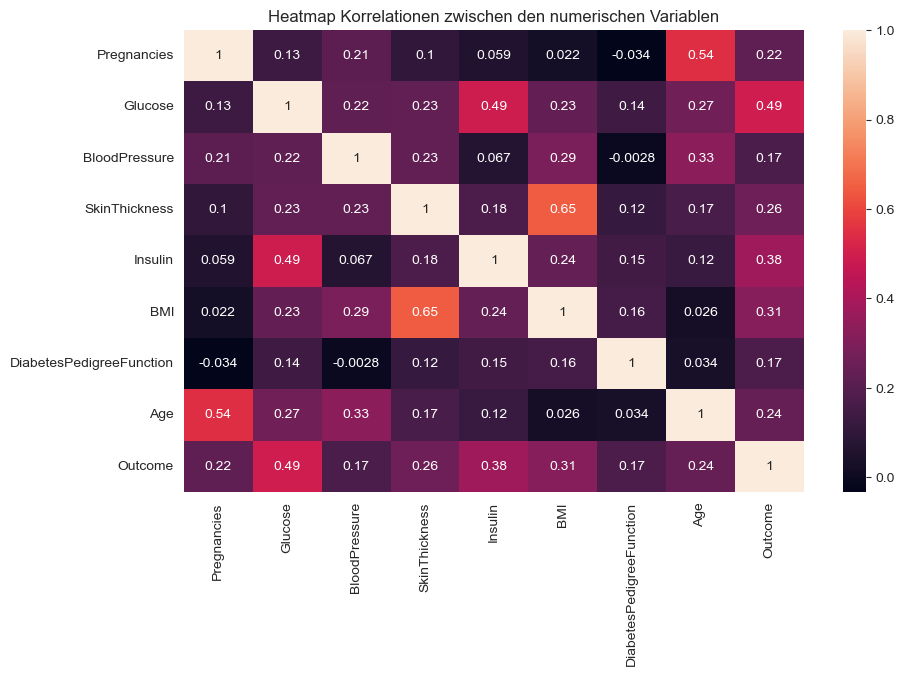

In [252]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(diabetes.corr(),annot=True,ax=ax)
plt.title("Heatmap Korrelationen zwischen den numerischen Variablen",fontsize=12)
plt.show()

## ZUSAMMEN FASSUNG EDA TODO
- 
- fdg
- dfg
- dg
- 

# Modellierung

### Logistic Regression

In [253]:
x = diabetes.drop(columns=['Outcome'], axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

In [254]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [255]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Vorhersage für Testdaten
y_pred_lr = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test, y_test)))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Evaluation des Models

In [ ]:
cflr = confusion_matrix(y_test,y_pred_lr)
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

**Classification Report**

1. Precision (Präzision):
Der Anteil der wahren positiven Vorhersagen unter allen positiven Vorhersagen.
Precision = TP / (TP + FP)

2. Recall (Rückruf):
Der Anteil der wahren positiven Vorhersagen unter allen tatsächlichen positiven Instanzen.
Recall = TP / (TP + FN)

3. F1-Score:
Das harmonische Mittel aus Precision und Recall.
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

4. Support:
Die Anzahl der tatsächlichen Instanzen für jede Klasse.

5. Accuracy (Genauigkeit):
Der Anteil der korrekten Vorhersagen insgesamt.
Accuracy = (TP + TN) / (TP + TN + FP + FN)

6. Macro AVG (Makro-Durchschnitt):
Der Durchschnitt der Metriken für jede Klasse, ohne dabei die Klassenhäufigkeiten zu berücksichtigen.

7. Weighted AVG (Gewichteter Durchschnitt):
Der gewichtete Durchschnitt der Metriken für jede Klasse, wobei die Klassenhäufigkeiten berücksichtigt werden.

In [ ]:
print(classification_report(y_test,y_pred_lr))

**AUC-ROC (Area Under the ROC Curve):** Die Fläche unter der ROC-Kurve. Eine AUC von 1,0 bedeutet perfekte Vorhersagen, während eine AUC von 0,5 auf eine zufällige Vorhersage hinweist.

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
print("ROC Accuracy: {}".format(roc_auc_score(y_test,y_pred_proba)))

## Random Forrest

In [ ]:
model = RandomForestClassifier(n_estimators=20, criterion = 'gini', bootstrap = True, random_state=100)
model.fit(X_train, y_train)

In [ ]:
y_pred_rf = model.predict(X_test)

In [ ]:
cfrf=confusion_matrix(y_test,y_pred_rf)
pd.crosstab(y_test, y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
plt.figure(figsize=(6, 6))
x_axis_labels = ['diabetes', 'gesund'] # labels for x-axis
y_axis_labels = ['diabetes', 'gesund'] # labels for y-axis
sns.heatmap(cfrf, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt=".2f", cmap='coolwarm')
plt.title("Confusion matrix heatmap", fontsize=16)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
fi_df = pd.DataFrame({
    "feature_importances" : model.feature_importances_,
    "features" : x.columns
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x="feature_importances", y="features", data=fi_df)
plt.show()

## kNN

In [ ]:
weights = 'distance'
n_neighbors = 9
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)


In [ ]:
y_pred_knn = clf.predict(X_test)

cfknn=confusion_matrix(y_test,y_pred_knn)
pd.crosstab(y_test, y_pred_knn, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
print(classification_report(y_test,y_pred_knn))

## VERGLEICH DER MODELLE

In [ ]:
recall_LR = cflr[0,0]
recall_RF = cfrf[0,0]
recall_kNN = cfknn[0,0]
precision_LR = cflr[1,1]
precision_RF = cfrf[1,1]
precision_kNN = cfknn[1,1]

werte = [recall_LR, recall_RF, recall_kNN,precision_LR, precision_RF,precision_kNN]
farben = ['red', 'red', 'red',  'lightgreen', 'lightgreen','lightgreen']
bars = plt.bar(range(len(werte)), werte, color = farben)

kategorien = ['Gesund LR', 'Gesund RF','Gesund kNN', 'Diabetes LR','Diabetes RF', 'Diabetes kNN']
plt.xticks(range(len(werte)), kategorien)

for bar, wert in zip(bars, werte):
    plt.annotate(str(wert), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, -15),
             textcoords='offset points', ha='center', va='bottom', color='black')

textblock = '''
Realität: 152 Gesund, 
79 Krank
'''

plt.text(4, 90, textblock, ha='center', va='center', bbox=dict(facecolor='lightgray', alpha=0.5))